# Lecture 2: Class demo

## Imports, Announcements, LOs

### Imports

In [1]:
# import the libraries
import os
import sys
sys.path.append("../code/.")
from plotting_functions import *
from utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

pd.set_option("display.max_colwidth", 200)

<br><br>

### Data

Let's bring back King County housing sale prediction data from the course introduction video. You can download the data from [here](https://www.kaggle.com/harlfoxem/housesalesprediction). 

In [2]:
housing_df = pd.read_csv('../data/kc_house_data.csv')
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Exploratory Data Analysis

Is this a classification problem or a regression problem? 

In [4]:
# How many data points do we have? 
n = housing_df.shape[0]
n

21613

In [5]:
# What are the columns in the dataset? 
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# Do we need to keep all the columns? 
X = housing_df.drop(columns=['id', 'date', 'zipcode', 'price'])
y = housing_df['price']

Let's explore some features. Let's try the `describe()` method

In [11]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
# What are the value counts of the `waterfront` feature?
X['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [13]:
# What are the value_counts of `yr_renovated` feature? 
X['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

Many opportunities to clean the data but we'll stop here. 

<br><br>

### Baseline model 

In [16]:
# Train a DummyRegressor model 

from sklearn.dummy import DummyRegressor # Import DummyRegressor 

# Create a class object for the sklearn model.
dummy = DummyRegressor()

# fit the dummy regressor 
dummy.fit(X, y)

# score the model 
dummy.score(X, y)

0.0

In [20]:
# predict on X using the model
dummy.predict(X)

[540088.14176653 540088.14176653 540088.14176653 ... 540088.14176653
 540088.14176653 540088.14176653]


<br><br>

### Decision tree model 

In [23]:
# Train a decision tree model 

from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor 

# Create a class object for the sklearn model.
dt = DecisionTreeRegressor()

# fit the decision tree regressor 
dt.fit(X, y)

# score the model 
dt.score(X, y)

0.9991338290544213

We are getting a perfect accuracy. Should we be happy with this model and deploy it? Why or why not?

What's the depth of this model? 

In [24]:
# dt.get_depth()
dt.get_depth()

38

### Data splitting 

Let's split the data and  
- Train on the train split 
- Score on the test split

In [25]:
# Split the data 
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) # random_state = seed

In [35]:
# Instantiate a class object 
dt = DecisionTreeRegressor(random_state=123)

# Train a decision tree on X_train, y_train
dt.fit(X_train, y_train)

# Score on the train set
dt.score(X_train, y_train)

0.9994394006711425

In [36]:
dt.get_depth()

39

In [37]:
# Score on the test set
dt.score(X_test, y_test)

0.719915905190645

### Activity: Discuss the following questions in your group

- Why is there a large gap between train and test scores? 
- What would be the effect of increasing or decreasing `test_size`?
- Why are we setting the `random_state`? Is it a good idea to try a bunch of values for the `random_state` and pick the one which gives the best scores? 
- Would be possible to further improve the scores? 

Let's try out different depths. 

In [38]:
# max_depth= 1 
dt = DecisionTreeRegressor(max_depth=1, random_state=123) 
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=123)

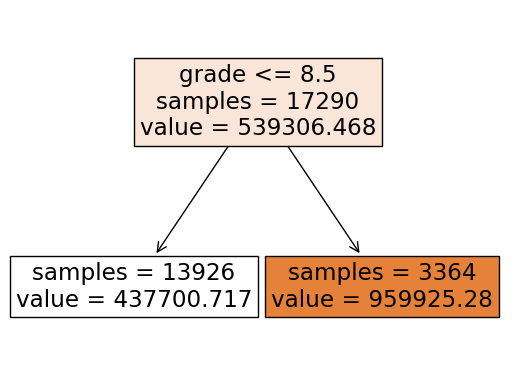

In [39]:
# Visualize your decision stump
from sklearn.tree import plot_tree 
plot_tree(dt, feature_names = X.columns.tolist(), impurity=False, filled=True);

In [40]:
dt.score(X_train, y_train) # Score on the train set

0.3209427041566191

In [41]:
dt.score(X_test, y_test) # Score on the test set

0.31767136668453344

- How do these scores compare to the previous scores? 

Let's try depth 10. 

In [42]:
dt = DecisionTreeRegressor(max_depth=10, random_state=123) # max_depth= 10 
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=123)

In [43]:
 dt.score(X_train, y_train) # Score on the train set

0.9108334653214172

In [44]:
dt.score(X_test, y_test) # Score on the test set

0.7728396574320712

Any improvements? Which depth should we pick? 

### Single validation set

We are using the test data again and again. How about creating a validation set to pick the right depth and assessing the final model on the test set?   

In [46]:
# Create a validation set 
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [58]:
tr_scores = []
valid_scores = []
depths = np.arange(1, 35, 2)

for depth in depths:
    # Create and fit a decision tree model for the given depth  
    dt = DecisionTreeRegressor(max_depth = depth, random_state = 123)
    dt.fit(X_tr, y_tr)
    # Calculate and append r2 scores on the training and validation sets
    tr_scores.append(dt.score(X_tr, y_tr))
    valid_scores.append(dt.score(X_valid, y_valid))
results_single_valid_df = pd.DataFrame({"train_score": tr_scores, 
                           "valid_score": valid_scores},index = depths)
results_single_valid_df

,train_score,valid_score
1,0.319559,0.326616
3,0.603739,0.555180
5,0.754938,0.677567
7,0.833913,0.737285
9,0.890456,0.763480
11,0.931896,0.790521
13,0.963024,0.769030
15,0.981643,0.752728
17,0.991810,0.735637
19,0.996424,0.745925


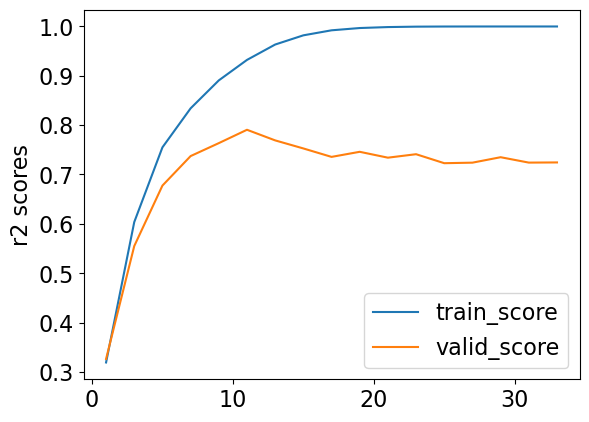

In [59]:
results_single_valid_df[['train_score', 'valid_score']].plot(ylabel='r2 scores');

What depth gives the best validation score? 

In [67]:
best_depth = results_single_valid_df.index.values[np.argmax(results_single_valid_df["valid_score"])]
best_depth

11

Let's assess the best model on the test set. 

In [68]:
test_model = DecisionTreeRegressor(max_depth=best_depth, random_state=123)
test_model.fit(X_train, y_train)
test_model.score(X_test, y_test)

0.7784948928666875

- How do the test scores compare to the validation scores? 
- Can we have a more robust estimate of the test score? 

### Cross-validation

In [69]:
depths = np.arange(1, 35, 2)

cv_train_scores = []
cv_valid_scores = []
for depth in depths: 
    
    # Create and fit a decision tree model for the given depth   
    dt = DecisionTreeRegressor(max_depth = depth, random_state=123)
    
    # Carry out cross-validation
    scores = cross_validate(dt, X_train, y_train, return_train_score=True)
    cv_train_scores.append(scores['train_score'].mean())
    cv_valid_scores.append(scores['test_score'].mean())
    


In [70]:
results_df = pd.DataFrame({"train_score": cv_train_scores, 
                           "valid_score": cv_valid_scores
                          },
                          index=depths
                           )
results_df

,train_score,valid_score
1,0.321050,0.322465
3,0.603243,0.559284
5,0.752169,0.688484
7,0.835876,0.758259
9,0.894960,0.768184
11,0.938201,0.772185
13,0.966812,0.760966
15,0.983340,0.754620
17,0.992220,0.730025
19,0.996487,0.722803


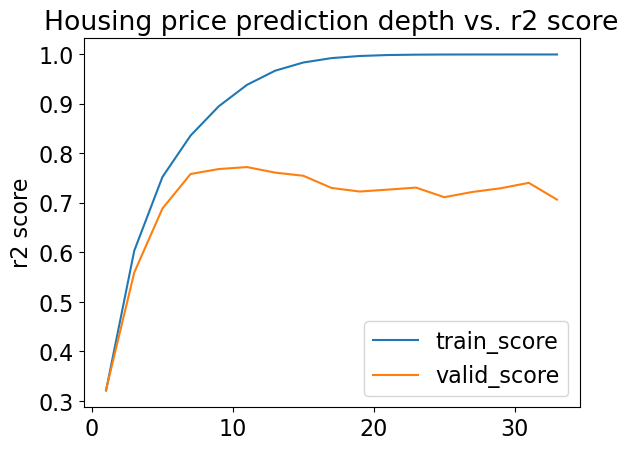

In [71]:
results_df[['train_score', 'valid_score']].plot(ylabel='r2 score', title='Housing price prediction depth vs. r2 score');

What's the "best" depth with cross-validation? 

In [75]:
best_depth = results_df.index.values[np.argmax(results_df['valid_score'])]
best_depth

11

### Discuss the following questions in your group

1. For which depth(s) we are underfitting? How about overfitting?
2. Above we are picking the depth which gives us the best cross-validation score. Is it always a good idea to pick such a depth? What if you have a much simpler model (smaller `max_depth`), which gives us almost the same CV scores?
3. If we care about the test scores in the end, why don't we use it in training? 
4. Do you trust our hyperparameter optimization? In other words, do you believe that we have found the best possible depth? 

### Assessing on the test set

In [76]:
dt_final = DecisionTreeRegressor(max_depth=best_depth, random_state=123)
dt_final.fit(X_train, y_train)
dt_final.score(X_train, y_train)

0.9308647034083802

In [ ]:
dt_final.score(X_test, y_test)

How do these scores compare to the scores when we used a single validation set? 

### Learned model 

In [77]:
# What's the depth of the model? 
dt_final.get_depth()

11

In [ ]:
plot_tree(dt_final, feature_names = X_train.columns.tolist(), impurity=False, filled=True);

In [ ]:
# Which features are the most important ones?
dt_final.feature_importances_

Let's examine feature importances. 

In [ ]:
df = pd.DataFrame( 
    data = {
        "features": dt_final.feature_names_in_,
        "feature_importances": dt_final.feature_importances_
    }
)
df.sort_values("feature_importances", ascending=False)

<br><br>